# Approach for identifying 'weak sale potential' images: K-Means Clustering

### Steps involved

Objective: To create a data set consisting of 'sale potential' and 'weak sale potential'
Approach: K-Means Clustering

Step 1: Initially, we cluster the sale potential (upvoted) images alone.

Step 2: We collect another dataset (low-score) from one-million dataset following certain criteria. 
        (Criteria: 1. no-sale, 2. non-upvoted, 3. new_score < 9, 4. new_age < maximum age of upvoted image)
        
Step 3: Merge the dataset in Step 1 & 2 into one dataset (upvoted+low_score).

Step 4: Cluster the data in the new file

Step 5: The clusters which deviate from the sale potential clusters are marked as 'weak sale potential'
        which are represented by 0 under new column, 'sale'.
        
Step 6: The clusters which belong to sale potential clusters are represented by 1 under new column, 'sale'. 

### Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
np.set_printoptions(edgeitems=250)  # inorder to display more items
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)  # inorder to display all columns in | dataset.head()
pd.set_option('display.max_rows', 500)

### upvoted dataset

In [2]:
# importing one million data set
data = pd.read_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/paradigmModel_dataset.csv',header=0)
# calculating new age and adding it to a new column
data['new_age'] = data['age'] - 362
data.head()        # 991481 rows × 30 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score
0,5461646,32806,1920,11934054,1558,318,5402,2211,125.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2
1,5203150,45412,1950,17814057,1588,52,16041,1553,100.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2
2,6672715,50411,1791,20592000,1429,79,2308,898,57.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,4.0,1.0,21.0,6.0,15.0,1.2,3.0,9.0
3,5178918,45412,1951,13586790,1589,52,16041,1553,100.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2
4,6153540,44570,1836,16000000,1474,16,14026,821,56.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,5.0,1.0,21.0,6.0,15.0,1.2,3.0,9.0


In [3]:
data.describe()

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score
count,9.914810e+05,991481.000000,991481.000000,9.914810e+05,991481.000000,991481.000000,991481.000000,9.914810e+05,991480.000000,991480.00000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000,991480.000000
mean,9.783441e+06,36781.039303,1821.916293,1.464523e+07,1459.916293,1299.631566,60441.228490,1.240814e+05,2623.290472,0.51697,0.115224,28.103775,0.673114,2.395597,1.998790,1.690380,1.059281,1.056420,1.347431,4.014505,3.459413,4.058151,4.320534,1.123859,24.128764,7.152302,16.976462,1.430460,3.395292,10.547594
std,6.895310e+06,25394.976621,1170.720429,7.875707e+06,1170.720429,3483.075320,129684.968514,2.606352e+05,7630.123660,3.85221,0.979142,122.906917,3.767828,32.575852,0.048918,1.464575,0.296518,0.288762,0.649133,0.956116,1.025061,1.191271,0.863945,0.530364,3.374021,1.273391,3.376353,0.254678,0.675271,1.322899
min,7.500000e+01,1.000000,362.000000,4.200000e+01,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,3.000000,2.000000,0.600000,0.400000,5.000000
25%,4.817344e+06,5362.000000,964.000000,9.720000e+06,602.000000,57.000000,2653.000000,1.685000e+03,176.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,1.000000,23.000000,6.000000,15.000000,1.200000,3.000000,9.800000
50%,9.954314e+06,40519.000000,1469.000000,1.216666e+07,1107.000000,224.000000,10941.000000,1.074200e+04,615.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,5.000000,1.000000,25.000000,7.000000,17.000000,1.400000,3.400000,10.600000
75%,1.487880e+07,57720.000000,2009.000000,1.819519e+07,1647.000000,774.000000,34303.000000,1.013710e+05,2126.000000,0.00000,0.000000,13.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,2.000000,5.000000,4.000000,5.000000,5.000000,1.000000,26.000000,8.000000,19.000000,1.600000,3.800000,11.400000
max,2.305004e+07,86192.000000,4634.000000,5.174100e+08,4272.000000,28294.000000,602477.000000,1.718332e+06,111388.000000,228.00000,186.000000,31611.000000,308.000000,6426.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,36.000000,15.000000,23.000000,3.000000,4.600000,19.200000


Maximum age is 11 years.

In [4]:
criteria_1 = data['new_age'] < 1825      # criteria of age < 5 years
df = data[criteria_1]
df.head()                                 # 751108 rows × 30 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score
0,5461646,32806,1920,11934054,1558,318,5402,2211,125.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2
1,5203150,45412,1950,17814057,1588,52,16041,1553,100.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2
2,6672715,50411,1791,20592000,1429,79,2308,898,57.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,4.0,1.0,21.0,6.0,15.0,1.2,3.0,9.0
3,5178918,45412,1951,13586790,1589,52,16041,1553,100.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2
4,6153540,44570,1836,16000000,1474,16,14026,821,56.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,5.0,1.0,21.0,6.0,15.0,1.2,3.0,9.0


In [5]:
df.describe()

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score
count,7.511080e+05,751108.000000,751108.000000,7.511080e+05,751108.000000,751108.000000,751108.000000,7.511080e+05,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000,751107.000000
mean,1.279357e+07,46930.330745,1207.819826,1.629168e+07,845.819826,1208.153246,76946.647012,7.218376e+04,2383.728342,0.628772,0.043288,1.345047,0.409979,2.112019,1.998466,2.231344,1.034683,1.026907,1.031742,3.969321,3.330625,3.799625,4.480842,1.149502,24.053059,7.323143,16.729916,1.464629,3.345983,10.669126
std,5.027080e+06,20246.326142,461.921092,7.950973e+06,461.921092,3404.607670,144670.934760,2.022670e+05,7936.151503,4.378665,0.468091,22.389992,3.258972,26.404684,0.055315,1.274500,0.238123,0.188018,0.184382,0.955257,1.023221,1.227050,0.769272,0.581623,3.434261,1.286711,3.486477,0.257342,0.697295,1.318501
min,4.001720e+06,18.000000,362.000000,4.200000e+01,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,5.000000,2.000000,1.000000,0.400000,5.400000
25%,8.578943e+06,36981.000000,814.000000,1.180765e+07,452.000000,54.000000,4537.000000,9.140000e+02,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,1.000000,22.000000,6.000000,15.000000,1.200000,3.000000,9.800000
50%,1.224892e+07,48597.000000,1228.000000,1.468109e+07,866.000000,217.000000,15518.000000,3.433000e+03,414.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,4.000000,5.000000,1.000000,25.000000,7.000000,17.000000,1.400000,3.400000,10.800000
75%,1.664370e+07,62126.000000,1629.000000,2.030646e+07,1267.000000,723.000000,57484.000000,3.056400e+04,1612.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,1.000000,26.000000,8.000000,19.000000,1.600000,3.800000,11.600000
max,2.305004e+07,86192.000000,2186.000000,5.174100e+08,1824.000000,28294.000000,602477.000000,1.718332e+06,111388.000000,228.000000,68.000000,6285.000000,308.000000,4730.000000,2.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,36.000000,15.000000,23.000000,3.000000,4.600000,19.200000


In [6]:
# add new column 'sale' and assign values applying condition on 'sales_count'
# df['sale'] = df['sales_count'].map(lambda x: 1 if x > 0 else 0)   # work only for a single column operation
# chance of chain indexing

### Prominent approach of adding column and applying condition
df['sale'] = 0
condition = df['sales_count'] > 0     # condition
df.loc[condition, 'sale'] = 1         # if condition is True
df.loc[~condition, 'sale'] = 0        # if condition is False

# re-ordering the columns
df = df[["image_id","user_id","age","totalresolution","new_age","contributor_sales","contributor_images_count","contributor_views","contributors_likes","collections","sales_count","view_count","like_count","search_impression","w1","w2","w3","w4","w5","w6","w7","w8","w9","w10","score","img_score_sum","pg_score_sum","img_score_avg","pg_score_avg","new_score","sale"]]
df.head()     # 6,81,297 rows x 31 columns

/home/irisind-pc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/irisind-pc/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale
0,5461646,32806,1920,11934054,1558,318,5402,2211,125.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2,0
1,5203150,45412,1950,17814057,1588,52,16041,1553,100.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2,0
2,6672715,50411,1791,20592000,1429,79,2308,898,57.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,4.0,1.0,21.0,6.0,15.0,1.2,3.0,9.0,0
3,5178918,45412,1951,13586790,1589,52,16041,1553,100.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,1.0,21.0,5.0,16.0,1.0,3.2,8.2,0
4,6153540,44570,1836,16000000,1474,16,14026,821,56.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,5.0,1.0,21.0,6.0,15.0,1.2,3.0,9.0,0


In [7]:
df[['sale']].eq(1).sum()     # images with sales status

sale    17010
dtype: int64

In [8]:
df[['sale']].eq(0).sum()     # images for which sales has not occured

sale    734098
dtype: int64

In [9]:
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False).head()

w2                    1
w5                    1
contributors_likes    1
collections           1
sales_count           1
dtype: int64

In [10]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer   
# class 'SimpleImputer' provides basic strategies for imputing missing values

imp = SimpleImputer(missing_values= np.nan, strategy='median')
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df) , columns=df.columns)

In [11]:
# How much of your data is missing?
# df.isnull().sum().sort_values(ascending=False).head()

Impute the missing values before changing the data type.

In [12]:
# changing the data type
df['image_id']=df.image_id.astype('int64')
df['user_id']=df.user_id.astype('int64')
df['age']=df.age.astype('int64')
df['totalresolution']=df.totalresolution.astype('int64')
df['new_age']=df.new_age.astype('int64')
df['contributor_sales']=df.contributor_sales.astype('int64')
df['contributor_images_count']=df.contributor_images_count.astype('int64')
df['contributor_views']=df.contributor_views.astype('int64')
df['contributors_likes']=df.contributors_likes.astype('int64')
df['collections']=df.collections.astype('int64')
df['sales_count']=df.sales_count.astype('int64')
df['view_count']=df.view_count.astype('int64')
df['like_count']=df.like_count.astype('int64')
df['search_impression']=df.search_impression.astype('int64')
df['w1']=df.w1.astype('int64')
df['w2']=df.w2.astype('int64')
df['w3']=df.w3.astype('int64')
df['w4']=df.w4.astype('int64')
df['w5']=df.w5.astype('int64')
df['w6']=df.w6.astype('int64')
df['w7']=df.w7.astype('int64')
df['w8']=df.w8.astype('int64')
df['w9']=df.w9.astype('int64')
df['w10']=df.w10.astype('int64')
df['score']=df.score.astype('int64')
df['img_score_sum']=df.img_score_sum.astype('int64')
df['pg_score_sum']=df.pg_score_sum.astype('int64')
df['sale']=df.sale.astype('category')
# print (df.dtypes)

### Features or predictors

In [13]:
feature_cols = ["totalresolution","contributor_sales","contributor_images_count","contributor_views","contributors_likes","collections","view_count","like_count","search_impression"]
X = df[feature_cols]            # 9 predictors with feature list

X.head()

,totalresolution,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,view_count,like_count,search_impression
0,11934054,318,5402,2211,125,0,0,0,0
1,17814057,52,16041,1553,100,0,0,0,0
2,20592000,79,2308,898,57,0,0,0,0
3,13586790,52,16041,1553,100,0,0,0,0
4,16000000,16,14026,821,56,1,0,0,0


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

/home/irisind-pc/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/irisind-pc/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Finding optimum number of clusters via elbow method

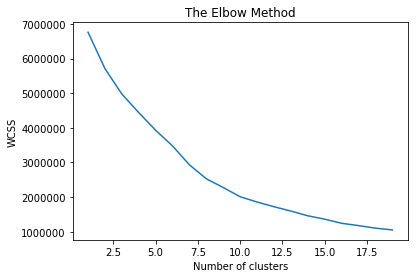

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  

Therefore, optimal number of clusters = 16

### K-Means Clustering

In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 16, init = 'k-means++', random_state = 0)

In [19]:
# Indicates to which cluster the data (customer) belongs
y_kmeans = kmeans.fit_predict(X)

In [20]:
# Adding addition column for clusters
df['sale_class'] = y_kmeans
df.head()       # 751108 rows × 32 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
0,5461646,32806,1920,11934054,1558,318,5402,2211,125,0,0,0,0,0,2,0,1,1,1,4,3,4,4,1,21,5,16,1.0,3.2,8.2,0.0,3
1,5203150,45412,1950,17814057,1588,52,16041,1553,100,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,0
2,6672715,50411,1791,20592000,1429,79,2308,898,57,0,0,0,0,0,2,1,1,1,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,0.0,0
3,5178918,45412,1951,13586790,1589,52,16041,1553,100,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,3
4,6153540,44570,1836,16000000,1474,16,14026,821,56,1,0,0,0,0,2,1,1,1,1,3,3,3,5,1,21,6,15,1.2,3.0,9.0,0.0,0


In [22]:
# set the data type of 'sale_class' as category
df['sale_class'] = df.sale_class.astype('category')
# print (df.dtypes)

In [23]:
# sale_class's unique categories and corresponding observations
print(df['sale_class'].value_counts().sort_values(ascending=False).head(20))  

3     331227
0     242191
4      42442
14     37577
13     19858
12     19336
6      16488
11     16419
1      15181
10      4218
15      2564
2       2002
9        729
7        661
5        204
8         11
Name: sale_class, dtype: int64


In [26]:
criteria_4 = df['sale_class'] == 4
df_cluster_4 = df[criteria_4] 
df_cluster_4.head()    # 42442 rows × 32 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
116561,7203057,53896,1731,11861136,1369,1144,489726,10742,185,0,0,15,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0,4
116962,7263427,53896,1728,11949581,1366,1144,489726,10742,185,0,1,1,0,1,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
117355,8836836,53896,1606,11881809,1244,1144,489726,10742,185,0,1,1,1,166,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
117584,8848854,53896,1605,11881809,1243,1144,489726,10742,185,0,1,1,0,0,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
118413,8840033,53896,1606,11881809,1244,1144,489726,10742,185,0,1,1,0,6,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4


In [28]:
criteria_7 = df['sale_class'] == 7
df_cluster_7 = df[criteria_7] 
df_cluster_7.head()   # 661 rows × 32 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
12009,9146246,57424,1564,12033961,1202,153,1929,1088,50,0,2,9,0,649,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0,7
19567,7942785,35779,1678,16084992,1316,1742,7516,71191,43695,1,4,33,6,869,2,1,2,3,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,7
19614,9999906,24481,1464,21026304,1102,28294,28203,1094212,26361,1,1,22,0,455,2,2,1,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
19623,9981958,24481,1466,6000000,1104,28294,28203,1094212,26361,1,1,20,0,482,2,2,1,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
19646,8788713,5816,1610,6000000,1248,7066,18394,328094,6298,0,3,24,0,571,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7


In [30]:
# concatenating sale potential & weak sale potential images
df_classifier_salePlusNoSale = pd.concat([df_cluster_4, df_cluster_7], ignore_index=True, sort=False )
df_classifier_salePlusNoSale.head()          # 43103 rows × 32 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
0,7203057,53896,1731,11861136,1369,1144,489726,10742,185,0,0,15,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0,4
1,7263427,53896,1728,11949581,1366,1144,489726,10742,185,0,1,1,0,1,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
2,8836836,53896,1606,11881809,1244,1144,489726,10742,185,0,1,1,1,166,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
3,8848854,53896,1605,11881809,1243,1144,489726,10742,185,0,1,1,0,0,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
4,8840033,53896,1606,11881809,1244,1144,489726,10742,185,0,1,1,0,6,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4


In [31]:
# writing the dataframe to a new csv file  **SalePotentialClusters=7*****Weak Potential Cluster = 4**considering sale and nosale images
df_classifier_salePlusNoSale.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/new4n7ClassifierDataset.csv', index=False, header=True)

In [21]:
criteria_1_1 = df['sale'] == 1
# criteria_1_2 = df['sale_class'] == 4
df_sale_1 = df[criteria_1_1] 
df_sale_1.head()     # 17010 rows × 32 columns  ## sale = 1

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
161,8628449,47133,1624,9909920,1262,12,2270,765,129,0,1,1,1,0,2,1,1,2,1,3,3,3,4,1,21,7,14,1.4,2.8,9.8,1.0,3
242,5864848,35754,1869,9832752,1507,76,211,2089,59,0,1,4,0,0,2,0,1,2,1,4,3,4,3,1,21,6,15,1.2,3.0,9.0,1.0,3
246,8043993,55346,1671,19171173,1309,122,367,1264,49,0,1,29,0,141,2,1,1,2,2,4,2,3,3,1,21,8,13,1.6,2.6,10.6,1.0,0
412,5191526,36532,1951,16084992,1589,33,1871,5146,319,1,1,9,0,20,2,0,1,2,1,3,3,4,4,1,21,6,15,1.2,3.0,9.0,1.0,0
557,7316478,40297,1726,11992640,1364,138,1164,1105,29,1,1,2,0,4,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0,3


In [22]:
df_sale_1.describe()     ## sale = 1

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score
count,1.701000e+04,17010.000000,17010.000000,1.701000e+04,17010.000000,17010.000000,17010.000000,1.701000e+04,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,9.349040e+06,37381.963727,1531.101764,1.626916e+07,1169.101764,4002.309406,43962.256790,1.615804e+05,7393.038154,0.860317,1.911464,19.009112,2.740035,58.640094,1.999647,1.317343,1.218048,2.188125,1.417578,4.583186,3.954968,4.515520,4.460024,1.214815,26.869253,8.140741,18.728513,1.628148,3.745703,11.886443
std,3.290615e+06,18033.164696,323.512833,7.160615e+06,323.512833,6717.502672,98372.586348,2.799128e+05,13744.599843,3.164305,2.470743,89.501474,11.322551,164.002242,0.026559,0.945980,0.586172,0.425812,0.553183,0.689949,0.921567,0.900167,0.779210,0.645041,3.104006,1.288732,2.927488,0.257746,0.585498,1.372737
min,4.002612e+06,18.000000,383.000000,1.997160e+05,21.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,10.000000,6.000000,2.000000,1.200000,0.400000,6.800000
25%,6.920140e+06,29433.000000,1367.000000,1.192058e+07,1005.000000,303.000000,3662.000000,7.521000e+03,551.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,26.000000,7.000000,18.000000,1.400000,3.600000,11.000000
50%,8.865019e+06,39904.000000,1603.000000,1.532759e+07,1241.000000,1075.000000,13604.000000,3.847400e+04,1637.000000,0.000000,1.000000,6.000000,0.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,5.000000,4.000000,5.000000,5.000000,1.000000,27.000000,8.000000,20.000000,1.600000,4.000000,11.800000
75%,1.080850e+07,48600.000000,1765.000000,2.102630e+07,1403.000000,3309.000000,28973.000000,1.459690e+05,5877.000000,1.000000,2.000000,18.000000,1.000000,35.000000,2.000000,2.000000,1.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,1.000000,29.000000,9.000000,20.000000,1.800000,4.000000,12.800000
max,2.277947e+07,84743.000000,2186.000000,2.005454e+08,1824.000000,28294.000000,602477.000000,1.718332e+06,111388.000000,228.000000,68.000000,5907.000000,308.000000,4730.000000,2.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,36.000000,15.000000,23.000000,3.000000,4.600000,19.200000


In [23]:
print(df_sale_1['sale_class'].value_counts().sort_values(ascending=False).head(20))   # (sale potential)

3     5954
0     4177
12    1769
11     877
15     775
7      660
14     622
13     547
10     539
1      434
6      257
9      220
2      107
4       66
8        5
5        1
Name: sale_class, dtype: int64


In [24]:
# criteria_a = df_cluster['sale_class'] == 2
# criteria_b = df_cluster['sale'] == 1
# df_cluster_test1 = df_cluster[criteria_a & criteria_b] 
# df_cluster_test1.mean()

In [25]:
criteria_0_1 = df['sale'] == 0
df_noSale = df[criteria_0_1] 
df_noSale.head()     # 734098 rows × 32 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
0,5461646,32806,1920,11934054,1558,318,5402,2211,125,0,0,0,0,0,2,0,1,1,1,4,3,4,4,1,21,5,16,1.0,3.2,8.2,0.0,3
1,5203150,45412,1950,17814057,1588,52,16041,1553,100,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,0
2,6672715,50411,1791,20592000,1429,79,2308,898,57,0,0,0,0,0,2,1,1,1,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,0.0,0
3,5178918,45412,1951,13586790,1589,52,16041,1553,100,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,3
4,6153540,44570,1836,16000000,1474,16,14026,821,56,1,0,0,0,0,2,1,1,1,1,3,3,3,5,1,21,6,15,1.2,3.0,9.0,0.0,0


In [26]:
df_noSale.describe()

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score
count,7.340980e+05,734098.000000,734098.000000,7.340980e+05,734098.000000,734098.000000,734098.000000,7.340980e+05,734098.000000,734098.000000,734098.0,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.0,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000,734098.000000
mean,1.287338e+07,47151.578757,1200.328966,1.629220e+07,838.328966,1143.409034,77710.937989,7.011233e+04,2267.653473,0.623406,0.0,0.935746,0.355988,0.802187,1.998439,2.252522,1.030435,1.0,1.022802,3.955097,3.316158,3.783037,4.481325,1.147988,23.987805,7.304198,16.683606,1.460840,3.336721,10.640920
std,5.032388e+06,20241.435194,461.965831,7.968361e+06,461.965831,3260.261032,145480.700942,1.996373e+05,7711.663992,4.402689,0.0,17.886486,2.787091,3.795711,0.055806,1.273360,0.221941,0.0,0.155450,0.955874,1.020940,1.228663,0.769034,0.579984,3.414111,1.280490,3.484809,0.256098,0.696962,1.303814
min,4.001720e+06,18.000000,362.000000,4.200000e+01,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,5.000000,2.000000,1.000000,0.400000,5.400000
25%,8.655534e+06,37081.000000,803.000000,1.180610e+07,441.000000,53.000000,4539.000000,9.000000e+02,133.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.0,1.000000,4.000000,3.000000,3.000000,4.000000,1.000000,22.000000,6.000000,15.000000,1.200000,3.000000,9.800000
50%,1.236915e+07,48930.000000,1211.000000,1.465000e+07,849.000000,208.000000,15551.000000,3.331000e+03,407.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.0,1.000000,4.000000,3.000000,4.000000,5.000000,1.000000,25.000000,7.000000,17.000000,1.400000,3.400000,10.600000
75%,1.674493e+07,62523.000000,1623.000000,2.027376e+07,1261.000000,701.000000,60901.000000,2.810800e+04,1537.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.0,1.000000,5.000000,4.000000,5.000000,5.000000,1.000000,26.000000,8.000000,19.000000,1.600000,3.800000,11.600000
max,2.305004e+07,86192.000000,2186.000000,5.174100e+08,1824.000000,28294.000000,602477.000000,1.718332e+06,111388.000000,228.000000,0.0,6285.000000,210.000000,609.000000,2.000000,5.000000,5.000000,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,35.000000,14.000000,23.000000,2.800000,4.600000,18.000000


In [27]:
print(df_noSale['sale_class'].value_counts().sort_values(ascending=False).head(20)) 

3     325273
0     238014
4      42376
14     36955
13     19311
12     17567
6      16231
11     15542
1      14747
10      3679
2       1895
15      1789
9        509
5        203
8          6
7          1
Name: sale_class, dtype: int64


### Calculating the average of the predictors for each cluster in 'sale' and 'no-sale' dataset separately.

In [28]:
# calculate categorical means for the categorical variable 'sale_class' for 'sale = 1'
info_1 = df_sale_1.groupby('sale_class').mean()

# sort by selective columns
info_1 = info_1[["totalresolution","contributor_sales","contributor_images_count","contributor_views","contributors_likes","collections","view_count","like_count","search_impression","new_score"]] 
info_1      

,totalresolution,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,view_count,like_count,search_impression,new_score
sale_class,,,,,,,,,,
0,2.005062e+07,1349.219536,22085.131195,5.503517e+04,1517.664831,0.325593,10.111085,0.553986,27.166387,11.599761
1,2.357878e+07,17460.000000,519995.000000,7.444350e+05,3733.000000,1.000000,4.179724,0.126728,13.788018,11.926267
2,1.685543e+07,1138.299065,8049.542056,2.491647e+05,102765.439252,0.000000,54.252336,19.990654,43.897196,13.859813
3,1.105320e+07,1009.318945,16308.835405,4.275805e+04,1435.809372,0.322640,9.225563,0.595230,26.061303,11.419550
4,1.264055e+07,1075.727273,499976.090909,9.961818e+03,186.909091,0.000000,1.954545,0.030303,18.590909,11.051515
5,8.640000e+06,28.000000,3802.000000,4.268000e+03,366.000000,228.000000,5.000000,2.000000,1.000000,10.800000
6,1.637498e+07,2430.237354,102756.478599,8.230046e+05,4398.373541,0.000000,8.101167,0.369650,16.840467,11.402335
7,1.618583e+07,5760.989394,36521.887879,2.114204e+05,8441.393939,0.590909,38.115152,2.571212,707.786364,12.973939
8,1.610362e+07,184.400000,638.200000,3.632660e+04,14518.800000,0.200000,4440.000000,171.400000,33.000000,17.600000


In [29]:
# calculate categorical means for the categorical variable 'sale_class' for 'sale = 0'
info_2 = df_noSale.groupby('sale_class').mean()

# sort by selective columns
info_2 = info_2[["totalresolution","contributor_sales","contributor_images_count","contributor_views","contributors_likes","collections","view_count","like_count","search_impression","new_score"]] 
info_2     # (low-score)
# info_2.sort_values(by='search_impression', ascending=True)

,totalresolution,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,view_count,like_count,search_impression,new_score
sale_class,,,,,,,,,,
0,1.997445e+07,459.448343,31251.931475,2.526828e+04,967.170818,0.221298,0.352920,0.127493,0.765732,10.633603
1,2.386803e+07,17460.000000,519995.000000,7.444350e+05,3733.000000,1.000000,0.128162,0.002102,0.565810,11.090120
2,1.574833e+07,802.750396,8978.351451,1.899888e+05,100446.460686,0.000000,21.615831,11.781530,0.963588,12.281478
3,1.072857e+07,356.954644,31024.877011,2.213470e+04,799.209818,0.196540,0.414606,0.128864,0.789063,10.476387
4,1.352919e+07,803.962314,540777.383731,6.856243e+03,194.508377,0.000000,0.009321,0.000094,0.158226,10.845384
5,8.762305e+06,28.000000,3802.000000,4.268000e+03,366.000000,228.000000,1.073892,0.073892,0.339901,10.026601
6,1.636685e+07,1342.567802,155903.698909,9.633385e+05,2910.995318,0.000000,0.138192,0.034317,0.272565,10.272281
7,1.198648e+07,223.000000,246.000000,7.671000e+03,656.000000,2.000000,4.000000,0.000000,609.000000,10.400000
8,1.930103e+07,335.333333,5048.500000,7.596633e+04,24386.166667,0.166667,5386.833333,47.333333,0.333333,15.766667


### Identifying high sale potential clusters

In [30]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 3
df_sale_1_3 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_3.head()     # sale = 1  && sale_class = 3

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
161,8628449,47133,1624,9909920,1262,12,2270,765,129,0,1,1,1,0,2,1,1,2,1,3,3,3,4,1,21,7,14,1.4,2.8,9.8,1.0,3
242,5864848,35754,1869,9832752,1507,76,211,2089,59,0,1,4,0,0,2,0,1,2,1,4,3,4,3,1,21,6,15,1.2,3.0,9.0,1.0,3
557,7316478,40297,1726,11992640,1364,138,1164,1105,29,1,1,2,0,4,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0,3
748,7837375,55250,1686,11847364,1324,181,5996,1073,43,1,1,3,0,0,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0,3
751,6346905,49587,1817,11835005,1455,20,1313,1491,299,1,1,0,0,3,2,1,1,2,1,3,3,3,4,1,21,7,14,1.4,2.8,9.8,1.0,3


In [31]:
# writing the dataframe to a new csv file
df_sale_1_3.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_3.csv', index=False, header=True)

In [32]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 0
df_sale_1_0 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_0.head()     # sale = 1  && sale_class = 0

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
246,8043993,55346,1671,19171173,1309,122,367,1264,49,0,1,29,0,141,2,1,1,2,2,4,2,3,3,1,21,8,13,1.6,2.6,10.6,1.0,0
412,5191526,36532,1951,16084992,1589,33,1871,5146,319,1,1,9,0,20,2,0,1,2,1,3,3,4,4,1,21,6,15,1.2,3.0,9.0,1.0,0
739,5285965,44843,1942,20480000,1580,182,1259,929,86,0,1,3,0,16,2,0,1,2,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,1.0,0
829,6822219,51476,1776,20857489,1414,24,462,574,575,0,1,5,0,7,2,1,1,2,1,3,4,3,3,1,21,7,14,1.4,2.8,9.8,1.0,0
1149,6827873,49921,1776,17915904,1414,87,691,822,102,0,1,1,0,1,2,1,1,2,1,4,3,3,3,1,21,7,14,1.4,2.8,9.8,1.0,0


In [33]:
# writing the dataframe to a new csv file
df_sale_1_0.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_0.csv', index=False, header=True)

In [34]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 12
df_sale_1_12 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_12.head()     # sale = 1  && sale_class = 12

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19484,5780480,35566,1884,10486144,1522,14578,16690,420772,33588,2,6,50,0,74,2,0,1,3,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,1.0,12
19485,5040259,35566,1959,16084992,1597,14578,16690,420772,33588,2,4,24,0,129,2,0,1,3,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,1.0,12
19490,5348031,35566,1936,16084992,1574,14578,16690,420772,33588,2,3,41,2,42,2,0,1,3,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,1.0,12
19500,5038695,35566,1959,16084992,1597,14578,16690,420772,33588,2,4,37,1,12,2,0,1,3,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,1.0,12
19506,6147489,35566,1836,16084992,1474,14578,16690,420772,33588,2,1,21,0,0,2,1,1,2,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,1.0,12


In [35]:
# writing the dataframe to a new csv file
df_sale_1_12.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_12.csv', index=False, header=True)

In [36]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 11
df_sale_1_11 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_11.head()     # sale = 1  && sale_class = 11

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19471,8744575,53945,1615,12115440,1253,1296,12383,74242,58576,0,1,25,10,12,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,11
19504,8627087,5362,1625,13695564,1263,2892,10941,145969,12708,1,3,15,0,344,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,11
19514,9810426,53945,1483,16706620,1121,1296,12383,74242,58576,0,1,22,8,7,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,11
19519,7524553,4467,1712,9436176,1350,1431,19032,393050,26880,0,1,25,6,8,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,11
19521,9275842,53945,1555,17513496,1193,1296,12383,74242,58576,0,1,17,8,3,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,11


In [37]:
# writing the dataframe to a new csv file
df_sale_1_11.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_11.csv', index=False, header=True)

In [38]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 15
df_sale_1_15 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_15.head()     # sale = 1  && sale_class = 15

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19489,6659014,24481,1792,7238690,1430,28294,28203,1094212,26361,1,6,28,1,109,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,15
19505,6911729,24481,1766,17915904,1404,28294,28203,1094212,26361,1,5,31,0,84,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,15
19516,7702185,1093,1697,22118400,1335,14519,24333,685846,7635,0,8,37,1,201,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,15
19517,9700006,24481,1497,21026304,1135,28294,28203,1094212,26361,1,1,44,6,312,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,15
19523,5038691,35566,1959,16084992,1597,14578,16690,420772,33588,2,4,34,1,132,2,0,1,3,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,1.0,15


In [39]:
# writing the dataframe to a new csv file
df_sale_1_15.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_15.csv', index=False, header=True)

In [40]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 7
df_sale_1_7 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_7.head()     # sale = 1  && sale_class = 7

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
12009,9146246,57424,1564,12033961,1202,153,1929,1088,50,0,2,9,0,649,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0,7
19567,7942785,35779,1678,16084992,1316,1742,7516,71191,43695,1,4,33,6,869,2,1,2,3,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,7
19614,9999906,24481,1464,21026304,1102,28294,28203,1094212,26361,1,1,22,0,455,2,2,1,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
19623,9981958,24481,1466,6000000,1104,28294,28203,1094212,26361,1,1,20,0,482,2,2,1,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
19646,8788713,5816,1610,6000000,1248,7066,18394,328094,6298,0,3,24,0,571,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7


In [41]:
# writing the dataframe to a new csv file
df_sale_1_7.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_7.csv', index=False, header=True)

In [42]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 14
df_sale_1_14 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_14.head()     # sale = 1  && sale_class = 14

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
8656,9509992,50501,1516,70540000,1154,192,5212,1728,50,0,1,9,0,1,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0,14
14417,6107062,46802,1840,35490164,1478,17,652,1103,297,1,1,3,0,2,2,0,1,2,1,3,3,3,3,1,19,6,13,1.2,2.6,8.6,1.0,14
17880,7702378,49146,1697,36152320,1335,22,300,1039,34,1,2,2,0,3,2,1,1,2,1,3,2,3,3,1,19,7,12,1.4,2.4,9.4,1.0,14
18600,9438333,46915,1528,30521428,1166,25,526,381,98,0,1,2,0,6,2,1,1,2,1,3,3,2,3,1,19,7,12,1.4,2.4,9.4,1.0,14
19497,7449066,1949,1721,36152320,1359,1256,2632,75246,6340,1,1,23,11,210,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,14


In [43]:
# writing the dataframe to a new csv file
df_sale_1_14.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_14.csv', index=False, header=True)

In [44]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 13
df_sale_1_13 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_13.head()     # sale = 1  && sale_class = 13

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19561,7426712,47600,1722,10661508,1360,871,6163,32546,17464,14,1,10,1,97,2,1,1,2,1,5,5,5,4,4,30,7,23,1.4,4.6,11.6,1.0,13
19583,8778735,57046,1612,15863624,1250,1065,6160,7634,1732,11,2,17,3,110,2,1,2,2,2,5,4,4,4,4,30,9,21,1.8,4.2,13.2,1.0,13
19626,7218276,47600,1730,7729680,1368,871,6163,32546,17464,14,1,4,0,4,2,1,1,2,1,5,5,5,4,4,30,7,23,1.4,4.6,11.6,1.0,13
19664,9528482,47741,1513,7406532,1151,173,12508,11585,2409,12,1,11,2,287,2,1,1,2,2,4,4,5,5,4,30,8,22,1.6,4.4,12.4,1.0,13
19670,6743496,19625,1783,16084992,1421,743,81676,182586,3735,12,1,2,0,0,2,1,1,2,1,5,4,5,5,4,30,7,23,1.4,4.6,11.6,1.0,13


In [45]:
# writing the dataframe to a new csv file
df_sale_1_13.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_13.csv', index=False, header=True)

In [46]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 10
df_sale_1_10 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_10.head()     # sale = 1  && sale_class = 10

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
8525,7073818,52642,1744,12280832,1382,3,48,668,168,0,2,116,33,0,2,1,3,2,3,2,3,3,1,1,21,11,10,2.2,2.0,13.0,1.0,10
16814,8781734,56791,1611,10745406,1249,3,71,151,36,0,1,45,20,5,2,1,3,2,2,2,2,2,2,1,19,10,9,2.0,1.8,11.8,1.0,10
19512,9158635,42483,1563,16727645,1201,835,3289,61667,28223,0,2,28,17,42,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,10
19513,8750772,33743,1614,10036224,1252,713,1890,100287,50068,0,1,33,19,240,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,10
19526,5674203,35492,1897,20399814,1535,437,1124,29968,3447,3,4,82,16,132,2,0,3,3,2,4,4,5,4,3,30,10,20,2.0,4.0,14.0,1.0,10


In [47]:
# writing the dataframe to a new csv file
df_sale_1_10.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_10.csv', index=False, header=True)

In [48]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 1
df_sale_1_1 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_1.head()     # sale = 1  && sale_class = 1

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19677,7805936,39904,1688,14745600,1326,17460,519995,744435,3733,1,3,22,0,4,2,1,2,3,2,5,4,5,5,1,30,10,20,2.0,4.0,14.0,1.0,1
21946,7826885,39904,1687,21026304,1325,17460,519995,744435,3733,1,6,36,3,3,2,1,2,3,2,5,4,5,5,1,30,10,20,2.0,4.0,14.0,1.0,1
22123,7810853,39904,1687,22118400,1325,17460,519995,744435,3733,1,8,18,0,125,2,1,2,3,2,5,4,5,5,1,30,10,20,2.0,4.0,14.0,1.0,1
22664,7485651,39904,1715,20203350,1353,17460,519995,744435,3733,1,1,15,0,0,2,1,1,2,2,5,4,5,5,1,28,8,20,1.6,4.0,12.0,1.0,1
23878,7837541,39904,1686,24000000,1324,17460,519995,744435,3733,1,3,4,1,0,2,1,1,3,1,5,4,5,5,1,28,8,20,1.6,4.0,12.0,1.0,1


In [49]:
# writing the dataframe to a new csv file
df_sale_1_1.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_1.csv', index=False, header=True)

In [50]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 6
df_sale_1_6 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_6.head()     # sale = 1  && sale_class = 6

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19546,7102924,2834,1739,14306600,1377,4008,26247,1005985,11316,0,1,13,4,9,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,6
20012,6696622,2134,1789,19797120,1427,924,23962,648845,6334,0,1,15,4,4,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,6
21138,9964293,2134,1468,22118400,1106,924,23962,648845,6334,0,3,8,0,46,2,2,1,3,1,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,6
21900,6188209,2834,1833,15901920,1471,4008,26247,1005985,11316,0,4,13,3,0,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,6
22378,8824132,2134,1607,20697600,1245,924,23962,648845,6334,0,1,8,1,82,2,1,1,2,1,5,5,5,5,1,28,7,21,1.4,4.2,11.2,1.0,6


In [51]:
# writing the dataframe to a new csv file
df_sale_1_6.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_6.csv', index=False, header=True)

In [52]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 9
df_sale_1_9 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_9.head()     # sale = 1  && sale_class = 9

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19487,5654895,45282,1901,15681600,1539,466,1706,32024,20116,0,8,129,50,307,2,0,3,3,3,4,5,5,4,1,30,11,19,2.2,3.8,14.8,1.0,9
19617,9827267,49313,1482,16032768,1120,249,1631,42080,43777,0,1,47,51,279,2,1,4,2,2,4,5,5,4,1,30,11,19,2.2,3.8,14.8,1.0,9
19953,5413386,11681,1927,15054336,1565,135,2211,35894,10783,1,1,145,74,8,2,0,4,2,3,4,5,5,4,1,30,11,19,2.2,3.8,14.8,1.0,9
19981,5286561,38890,1941,12156690,1579,63,1675,28160,17561,0,1,128,59,0,2,0,4,2,3,4,5,5,4,1,30,11,19,2.2,3.8,14.8,1.0,9
20089,6737514,47452,1783,16084992,1421,44,246,25172,8636,0,1,180,73,0,2,1,4,2,3,4,5,5,3,1,30,12,18,2.4,3.6,15.6,1.0,9


In [53]:
# writing the dataframe to a new csv file
df_sale_1_9.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_9.csv', index=False, header=True)

In [54]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 2
df_sale_1_2 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_2.head()     # sale = 1  && sale_class = 2

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19483,7103857,4723,1739,15054336,1377,1592,5337,334951,101923,0,1,68,31,1,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,2
19592,8740477,4723,1615,17070325,1253,1592,5337,334951,101923,0,1,58,16,83,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,2
19628,8824136,4723,1607,20644416,1245,1592,5337,334951,101923,0,1,72,15,388,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,2
19708,8908130,4723,1596,17915904,1234,1592,5337,334951,101923,0,1,38,17,6,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,2
19742,8834448,4766,1606,15488158,1244,895,4269,191471,84000,0,1,71,35,4,2,1,3,2,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,2


In [55]:
# writing the dataframe to a new csv file
df_sale_1_2.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_2.csv', index=False, header=True)

In [56]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 4
df_sale_1_4 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_4.head()     # sale = 1  && sale_class = 4

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
116962,7263427,53896,1728,11949581,1366,1144,489726,10742,185,0,1,1,0,1,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
117355,8836836,53896,1606,11881809,1244,1144,489726,10742,185,0,1,1,1,166,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
117584,8848854,53896,1605,11881809,1243,1144,489726,10742,185,0,1,1,0,0,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
118413,8840033,53896,1606,11881809,1244,1144,489726,10742,185,0,1,1,0,6,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4
118987,7370719,53896,1725,12119980,1363,1144,489726,10742,185,0,1,3,0,8,2,1,1,2,1,5,3,5,5,1,26,7,19,1.4,3.8,10.8,1.0,4


In [57]:
# writing the dataframe to a new csv file
df_sale_1_4.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_4.csv', index=False, header=True)

In [58]:
criteria_1_1 = df['sale'] == 1
criteria_1_2 = df['sale_class'] == 8
df_sale_1_8 = df[criteria_1_1 & criteria_1_2] 
df_sale_1_8.head()     # sale = 1  && sale_class = 8

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
42342,5718690,46743,1895,11764155,1533,394,1065,59068,23971,0,1,3994,138,8,2,0,4,2,5,4,5,5,4,1,32,13,19,2.6,3.8,16.8,1.0,8
50899,5888385,46743,1867,12212224,1505,394,1065,59068,23971,0,3,4335,162,13,2,0,4,3,5,4,5,5,4,1,33,14,19,2.8,3.8,17.8,1.0,8
61316,8526986,32389,1636,17915904,1274,85,784,18543,2904,1,1,5907,77,28,2,1,4,2,5,4,4,5,3,1,31,14,17,2.8,3.4,17.4,1.0,8
61448,6864050,49672,1772,14625792,1410,27,161,35008,18744,0,1,3234,308,91,2,1,5,2,5,3,5,5,2,1,31,15,16,3.0,3.2,18.2,1.0,8
220715,7808334,52693,1688,24000000,1326,22,116,9946,3004,0,4,4730,172,25,2,1,4,3,5,3,4,4,2,1,29,15,14,3.0,2.8,17.8,1.0,8


In [59]:
# writing the dataframe to a new csv file
df_sale_1_8.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster1_8.csv', index=False, header=True)

### Identifying weak sale potential clusters

In [60]:
criteria_0_4 = df_noSale['sale_class'] == 4
df_noSale_4 = df_noSale[criteria_0_4]                                    # cluster 4 with 'sale = 0'
df_noSale_4.head()         # 42376 rows × 32 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
116561,7203057,53896,1731,11861136,1369,1144,489726,10742,185,0,0,15,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0,4
119140,7242440,53896,1729,16000000,1367,1144,489726,10742,185,0,0,16,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0,4
127843,7396145,53896,1725,6250000,1363,1144,489726,10742,185,0,0,17,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0,4
132564,7209789,53896,1730,11861136,1368,1144,489726,10742,185,0,0,17,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0,4
134196,7400636,53896,1725,6250000,1363,1144,489726,10742,185,0,0,12,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0,4


In [61]:
criteria_0_1 = df_noSale['sale_class'] == 5
df_noSale_5 = df_noSale[criteria_0_1]
df_noSale_5.head()         # sale = 0  && sale_class = 5

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
153588,9956014,46470,1469,9000000,1107,28,3802,4268,366,228,0,1,0,7,2,2,1,1,1,3,3,4,4,5,26,7,19,1.4,3.8,10.8,0.0,5
155854,9955983,46470,1469,7560000,1107,28,3802,4268,366,228,0,2,0,1,2,2,1,1,1,3,3,4,4,5,26,7,19,1.4,3.8,10.8,0.0,5
156558,9689514,46470,1497,8640000,1135,28,3802,4268,366,228,0,1,0,0,2,1,1,1,1,3,3,4,4,5,25,6,19,1.2,3.8,9.8,0.0,5
157184,9757947,46470,1491,9000000,1129,28,3802,4268,366,228,0,1,0,0,2,1,1,1,1,3,3,4,4,5,25,6,19,1.2,3.8,9.8,0.0,5
157662,9453080,46470,1525,9000000,1163,28,3802,4268,366,228,0,1,0,0,2,1,1,1,1,3,3,4,4,5,25,6,19,1.2,3.8,9.8,0.0,5


In [77]:
# writing the dataframe to a new csv file
df_noSale_5.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_5.csv', index=False, header=True)

In [62]:
criteria_0_1 = df_noSale['sale_class'] == 6
df_noSale_6 = df_noSale[criteria_0_1]
df_noSale_6.head()         # sale = 0  && sale_class = 6

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
22322,9964750,2834,1468,15864331,1106,4008,26247,1005985,11316,0,0,0,0,1,2,2,1,1,1,5,5,5,5,1,28,7,21,1.4,4.2,11.2,0.0,6
22403,9964288,2134,1468,14567040,1106,924,23962,648845,6334,0,0,0,0,0,2,2,1,1,1,5,5,5,5,1,28,7,21,1.4,4.2,11.2,0.0,6
22733,9957330,2134,1469,22118400,1107,924,23962,648845,6334,0,0,1,1,0,2,2,1,1,1,5,5,5,5,1,28,7,21,1.4,4.2,11.2,0.0,6
22783,9973594,2134,1467,22118400,1105,924,23962,648845,6334,0,0,0,0,0,2,2,1,1,1,5,5,5,5,1,28,7,21,1.4,4.2,11.2,0.0,6
23299,9964744,2834,1468,23760450,1106,4008,26247,1005985,11316,0,0,0,0,0,2,2,1,1,1,5,5,5,5,1,28,7,21,1.4,4.2,11.2,0.0,6


In [78]:
# writing the dataframe to a new csv file
df_noSale_6.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_6.csv', index=False, header=True)

In [63]:
criteria_0_1 = df_noSale['sale_class'] == 14
df_noSale_14 = df_noSale[criteria_0_1]
df_noSale_14.head()         # sale = 0  && sale_class = 14

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
58,9585447,50833,1506,30246876,1144,97,7520,976,219,1,0,0,0,0,2,1,1,1,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,0.0,14
62,6488310,50213,1798,36152320,1436,55,5161,900,167,0,0,0,0,0,2,1,1,1,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,0.0,14
67,5175021,45412,1951,46015620,1589,52,16041,1553,100,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,14
107,5793225,45940,1881,32732022,1519,70,9618,2098,247,0,0,0,0,1,2,0,1,1,1,4,3,4,4,1,21,5,16,1.0,3.2,8.2,0.0,14
116,7821859,55249,1687,31539456,1325,124,8123,761,87,0,0,0,0,0,2,1,1,1,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,0.0,14


In [79]:
# writing the dataframe to a new csv file
df_noSale_14.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_14.csv', index=False, header=True)

In [64]:
criteria_0_1 = df_noSale['sale_class'] == 0
df_noSale_0 = df_noSale[criteria_0_1]
df_noSale_0.head()         # sale = 0  && sale_class = 0

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
1,5203150,45412,1950,17814057,1588,52,16041,1553,100,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,0
2,6672715,50411,1791,20592000,1429,79,2308,898,57,0,0,0,0,0,2,1,1,1,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,0.0,0
4,6153540,44570,1836,16000000,1474,16,14026,821,56,1,0,0,0,0,2,1,1,1,1,3,3,3,5,1,21,6,15,1.2,3.0,9.0,0.0,0
7,5560285,46649,1914,21026304,1552,246,5594,2113,396,0,0,0,0,0,2,0,1,1,1,4,3,4,4,1,21,5,16,1.0,3.2,8.2,0.0,0
8,8324880,55249,1652,22581504,1290,124,8123,761,87,0,0,0,0,1,2,1,1,1,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,0.0,0


In [80]:
# writing the dataframe to a new csv file
df_noSale_0.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_0.csv', index=False, header=True)

In [65]:
criteria_0_1 = df_noSale['sale_class'] == 3
df_noSale_3 = df_noSale[criteria_0_1]
df_noSale_3.head()         # sale = 0  && sale_class = 3

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
0,5461646,32806,1920,11934054,1558,318,5402,2211,125,0,0,0,0,0,2,0,1,1,1,4,3,4,4,1,21,5,16,1.0,3.2,8.2,0.0,3
3,5178918,45412,1951,13586790,1589,52,16041,1553,100,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,3
5,6335285,37170,1819,12192768,1457,22,1093,4112,157,0,0,0,0,0,2,1,1,1,1,3,3,4,4,1,21,6,15,1.2,3.0,9.0,0.0,3
6,5974437,47723,1859,9794565,1497,119,6756,1492,827,0,0,1,0,0,2,0,1,1,1,4,4,3,4,1,21,5,16,1.0,3.2,8.2,0.0,3
10,6094117,5343,1841,6250000,1479,48,15150,1738,104,0,0,0,0,0,2,0,1,1,1,4,3,3,5,1,21,5,16,1.0,3.2,8.2,0.0,3


In [81]:
# writing the dataframe to a new csv file
df_noSale_3.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_3.csv', index=False, header=True)

In [67]:
criteria_0_1 = df_noSale['sale_class'] == 13
df_noSale_13 = df_noSale[criteria_0_1]
df_noSale_13.head()         # sale = 0  && sale_class = 13

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
897,5793656,45811,1881,24000000,1519,2,97,2087,493,7,0,65,9,0,2,0,2,1,2,2,3,4,2,3,21,7,14,1.4,2.8,9.8,0.0,13
944,5988430,47337,1856,23073126,1494,32,104,5422,120,7,0,65,3,0,2,0,1,1,2,3,3,4,2,3,21,6,15,1.2,3.0,9.0,0.0,13
1375,7964496,29245,1677,15054336,1315,7,465,8952,498,10,0,0,0,2,2,1,1,1,1,2,3,4,3,3,21,6,15,1.2,3.0,9.0,0.0,13
2859,7125169,29245,1734,17915904,1372,7,465,8952,498,10,0,4,1,0,2,1,1,1,1,2,3,4,3,3,21,6,15,1.2,3.0,9.0,0.0,13
3407,6920674,42299,1765,9980928,1403,5,197,2779,383,12,0,2,0,0,2,1,1,1,1,2,3,4,2,4,21,6,15,1.2,3.0,9.0,0.0,13


In [82]:
# writing the dataframe to a new csv file
df_noSale_13.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_13.csv', index=False, header=True)

In [68]:
criteria_0_1 = df_noSale['sale_class'] == 1
df_noSale_1 = df_noSale[criteria_0_1]
df_noSale_1.head()         # sale = 0  && sale_class = 1

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
115493,7864716,39904,1684,24000000,1322,17460,519995,744435,3733,1,0,0,0,0,2,1,1,1,1,5,4,5,5,1,26,6,20,1.2,4.0,10.0,0.0,1
115505,7891387,39904,1682,22118400,1320,17460,519995,744435,3733,1,0,1,0,0,2,1,1,1,1,5,4,5,5,1,26,6,20,1.2,4.0,10.0,0.0,1
115517,7058887,39904,1746,24000000,1384,17460,519995,744435,3733,1,0,0,0,0,2,1,1,1,1,5,4,5,5,1,26,6,20,1.2,4.0,10.0,0.0,1
115552,7890295,39904,1682,22118400,1320,17460,519995,744435,3733,1,0,0,0,0,2,1,1,1,1,5,4,5,5,1,26,6,20,1.2,4.0,10.0,0.0,1
115614,7847898,39904,1685,35000000,1323,17460,519995,744435,3733,1,0,0,0,0,2,1,1,1,1,5,4,5,5,1,26,6,20,1.2,4.0,10.0,0.0,1


In [83]:
# writing the dataframe to a new csv file
df_noSale_1.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_1.csv', index=False, header=True)

In [69]:
criteria_0_1 = df_noSale['sale_class'] == 11
df_noSale_11 = df_noSale[criteria_0_1]
df_noSale_11.head()         # sale = 0  && sale_class = 11

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19477,8000706,32614,1675,7121424,1313,60,8674,96236,30121,13,0,12,5,0,2,1,2,1,2,4,5,5,4,4,30,8,22,1.6,4.4,12.4,0.0,11
19501,9062798,40519,1569,14155776,1207,1460,7680,36469,17633,2,0,17,11,2,2,1,3,1,2,5,5,5,4,2,30,9,21,1.8,4.2,13.2,0.0,11
19508,7640105,53945,1703,12166656,1341,1296,12383,74242,58576,0,0,32,12,1,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,11
19511,7797320,32614,1690,12166656,1328,60,8674,96236,30121,13,0,12,10,0,2,1,2,1,2,4,5,5,4,4,30,8,22,1.6,4.4,12.4,0.0,11
19537,7031812,4467,1749,18784260,1387,1431,19032,393050,26880,0,0,25,12,2,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,11


In [84]:
# writing the dataframe to a new csv file
df_noSale_11.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_11.csv', index=False, header=True)

In [70]:
criteria_0_1 = df_noSale['sale_class'] == 2
df_noSale_2 = df_noSale[criteria_0_1]
df_noSale_2.head()         # sale = 0  && sale_class = 2

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19472,8192569,27722,1658,12000000,1296,567,13604,144596,111388,0,0,17,12,0,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,2
19482,9448841,27722,1526,12000000,1164,567,13604,144596,111388,0,0,30,19,0,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,2
19486,9633467,27722,1500,12000000,1138,567,13604,144596,111388,0,0,26,15,0,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,2
19498,7021150,27722,1751,12000000,1389,567,13604,144596,111388,0,0,29,11,0,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,2
19503,8998914,27722,1580,12000000,1218,567,13604,144596,111388,0,0,22,11,0,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,2


In [85]:
# writing the dataframe to a new csv file
df_noSale_2.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_2.csv', index=False, header=True)

In [71]:
criteria_0_1 = df_noSale['sale_class'] == 12
df_noSale_12 = df_noSale[criteria_0_1]
df_noSale_12.head()         # sale = 0  && sale_class = 12

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19515,9519943,35566,1515,10036224,1153,14578,16690,420772,33588,2,0,39,10,0,2,1,2,1,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,0.0,12
19541,9610558,35566,1502,16032768,1140,14578,16690,420772,33588,2,0,15,8,10,2,1,2,1,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,0.0,12
19671,9513029,35566,1516,16084992,1154,14578,16690,420772,33588,2,0,17,5,0,2,1,2,1,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,0.0,12
19678,6481850,35566,1799,16084992,1437,14578,16690,420772,33588,2,0,35,7,33,2,1,2,1,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,0.0,12
19732,9855322,35566,1478,13286130,1116,14578,16690,420772,33588,2,0,22,8,0,2,1,2,1,2,5,5,5,5,2,30,8,22,1.6,4.4,12.4,0.0,12


In [86]:
# writing the dataframe to a new csv file
df_noSale_12.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_12.csv', index=False, header=True)

In [72]:
criteria_0_1 = df_noSale['sale_class'] == 10
df_noSale_10 = df_noSale[criteria_0_1]
df_noSale_10.head()         # sale = 0  && sale_class = 10

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
3643,9933985,57722,1472,12212224,1110,5,94,1382,643,0,0,32,20,2,2,1,3,1,2,2,4,3,2,1,21,9,12,1.8,2.4,11.4,0.0,10
3835,8497827,20527,1640,6016000,1278,4,29,2461,584,0,0,51,23,0,2,1,3,1,2,2,4,4,1,1,21,9,12,1.8,2.4,11.4,0.0,10
6452,7449051,54152,1721,17445888,1359,2,198,1297,915,0,0,47,14,1,2,1,3,1,2,2,4,3,2,1,21,9,12,1.8,2.4,11.4,0.0,10
10705,5602660,46528,1908,12000000,1546,6,533,1777,661,0,0,24,19,1,2,0,3,1,2,2,4,3,3,1,21,8,13,1.6,2.6,10.6,0.0,10
11128,8498781,52476,1640,17915904,1278,6,39,4552,2076,0,0,83,15,0,2,1,3,1,2,2,4,4,1,1,21,9,12,1.8,2.4,11.4,0.0,10


In [87]:
# writing the dataframe to a new csv file
df_noSale_10.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_10.csv', index=False, header=True)

In [73]:
criteria_0_1 = df_noSale['sale_class'] == 9
df_noSale_9 = df_noSale[criteria_0_1]
df_noSale_9.head()         # sale = 0  && sale_class = 9

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
19491,8512068,4723,1638,18958815,1276,1592,5337,334951,101923,0,0,214,42,0,2,1,3,1,3,5,5,5,4,1,30,10,20,2.0,4.0,14.0,0.0,9
19492,6818997,10659,1777,16084992,1415,89,2202,185984,67423,0,0,264,88,0,2,1,4,1,3,4,5,5,4,1,30,11,19,2.2,3.8,14.8,0.0,9
19509,5475836,42483,1918,22118400,1556,835,3289,61667,28223,0,0,140,58,1,2,0,4,1,3,5,5,5,4,1,30,10,20,2.0,4.0,14.0,0.0,9
19578,6364353,10659,1814,14989307,1452,89,2202,185984,67423,0,0,168,60,1,2,1,4,1,3,4,5,5,4,1,30,11,19,2.2,3.8,14.8,0.0,9
19584,8104095,39308,1665,18832800,1303,238,1046,42901,13763,0,0,166,62,0,2,1,4,1,3,4,5,5,4,1,30,11,19,2.2,3.8,14.8,0.0,9


In [88]:
# writing the dataframe to a new csv file
df_noSale_9.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_9.csv', index=False, header=True)

In [74]:
criteria_0_1 = df_noSale['sale_class'] == 15
df_noSale_15 = df_noSale[criteria_0_1]
df_noSale_15.head()         # sale = 0  && sale_class = 15

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
20581,9442845,24481,1527,6142550,1165,28294,28203,1094212,26361,1,0,48,11,15,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,15
20728,6379552,24481,1812,19292680,1450,28294,28203,1094212,26361,1,0,20,13,2,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,15
21683,9442843,24481,1527,5880000,1165,28294,28203,1094212,26361,1,0,28,14,9,2,1,3,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,15
22245,9954388,24481,1469,17915904,1107,28294,28203,1094212,26361,1,0,23,5,21,2,2,2,1,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,0.0,15
22308,8607483,24481,1627,12704180,1265,28294,28203,1094212,26361,1,0,19,2,2,2,1,1,1,2,5,5,5,5,1,28,7,21,1.4,4.2,11.2,0.0,15


In [89]:
# writing the dataframe to a new csv file
df_noSale_15.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_15.csv', index=False, header=True)

In [75]:
criteria_0_1 = df_noSale['sale_class'] == 8
df_noSale_8 = df_noSale[criteria_0_1]
df_noSale_8.head()         # sale = 0  && sale_class = 8

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
24734,5859921,47310,1870,21026304,1508,791,21748,15260,144,1,0,4467,0,0,2,0,1,1,5,5,3,5,5,1,28,9,19,1.8,3.8,12.8,0.0,8
42378,8844056,39308,1606,18832800,1244,238,1046,42901,13763,0,0,5398,60,1,2,1,4,1,5,4,5,5,4,1,32,13,19,2.6,3.8,16.8,0.0,8
42391,8775195,39050,1612,21026304,1250,313,2417,124155,41258,0,0,6285,65,1,2,1,4,1,5,4,5,5,4,1,32,13,19,2.6,3.8,16.8,0.0,8
61146,8733347,47452,1615,9830400,1253,44,246,25172,8636,0,0,4980,69,0,2,1,4,1,5,4,5,5,3,1,31,13,18,2.6,3.6,16.6,0.0,8
61241,8514091,39050,1637,21026304,1275,313,2417,124155,41258,0,0,5265,48,0,2,1,3,1,5,4,5,5,4,1,31,12,19,2.4,3.8,15.8,0.0,8


In [90]:
# writing the dataframe to a new csv file
df_noSale_8.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/cluster0_8.csv', index=False, header=True)

In [76]:
criteria_0_1 = df_noSale['sale_class'] == 7
df_noSale_7 = df_noSale[criteria_0_1]
df_noSale_7.head()         # sale = 0  && sale_class = 7

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
579524,10730894,12709,1375,11986480,1013,223,246,7671,656,2,0,4,0,609,2,2,1,1,1,4,4,4,3,2,24,7,17,1.4,3.4,10.4,0.0,7


In [55]:
df_noSale_4 = df_noSale_4.drop(['sale_class'], axis = 1)  # dropping 'sale_class' column
df_noSale_4.head()            # 42376 rows × 31 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale
116561,7203057,53896,1731,11861136,1369,1144,489726,10742,185,0,0,15,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0
119140,7242440,53896,1729,16000000,1367,1144,489726,10742,185,0,0,16,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0
127843,7396145,53896,1725,6250000,1363,1144,489726,10742,185,0,0,17,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0
132564,7209789,53896,1730,11861136,1368,1144,489726,10742,185,0,0,17,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0
134196,7400636,53896,1725,6250000,1363,1144,489726,10742,185,0,0,12,0,0,2,1,1,1,2,5,3,5,5,1,26,7,19,1.4,3.8,10.8,0.0


In [56]:
df_sale_1 = df_sale_1.drop(['sale_class'], axis = 1)  # dropping 'sale_class' column
df_sale_1           # 17010 rows × 31 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale
161,8628449,47133,1624,9909920,1262,12,2270,765,129,0,1,1,1,0,2,1,1,2,1,3,3,3,4,1,21,7,14,1.4,2.8,9.8,1.0
242,5864848,35754,1869,9832752,1507,76,211,2089,59,0,1,4,0,0,2,0,1,2,1,4,3,4,3,1,21,6,15,1.2,3.0,9.0,1.0
246,8043993,55346,1671,19171173,1309,122,367,1264,49,0,1,29,0,141,2,1,1,2,2,4,2,3,3,1,21,8,13,1.6,2.6,10.6,1.0
412,5191526,36532,1951,16084992,1589,33,1871,5146,319,1,1,9,0,20,2,0,1,2,1,3,3,4,4,1,21,6,15,1.2,3.0,9.0,1.0
557,7316478,40297,1726,11992640,1364,138,1164,1105,29,1,1,2,0,4,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0
739,5285965,44843,1942,20480000,1580,182,1259,929,86,0,1,3,0,16,2,0,1,2,1,4,3,3,4,1,21,6,15,1.2,3.0,9.0,1.0
748,7837375,55250,1686,11847364,1324,181,5996,1073,43,1,1,3,0,0,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0
751,6346905,49587,1817,11835005,1455,20,1313,1491,299,1,1,0,0,3,2,1,1,2,1,3,3,3,4,1,21,7,14,1.4,2.8,9.8,1.0
795,6344837,49587,1818,11600000,1456,20,1313,1491,299,1,2,3,1,10,2,1,1,2,1,3,3,3,4,1,21,7,14,1.4,2.8,9.8,1.0
829,6822219,51476,1776,20857489,1414,24,462,574,575,0,1,5,0,7,2,1,1,2,1,3,4,3,3,1,21,7,14,1.4,2.8,9.8,1.0


### Concatenating sale potential & weak sale potential images

In [93]:
# concatenating sale potential & weak sale potential images
df_classifier_salePlusNoSale = pd.concat([df_sale_1_7, df_sale_1_8, df_sale_1_15, df_sale_1_9, df_noSale_4], ignore_index=True, sort=False )
df_classifier_salePlusNoSale          # 47328 rows × 32 columns

,image_id,user_id,age,totalresolution,new_age,contributor_sales,contributor_images_count,contributor_views,contributors_likes,collections,sales_count,view_count,like_count,search_impression,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,score,img_score_sum,pg_score_sum,img_score_avg,pg_score_avg,new_score,sale,sale_class
0,9146246,57424,1564,12033961,1202,153,1929,1088,50,0,2,9,0,649,2,1,1,2,1,4,2,3,4,1,21,7,14,1.4,2.8,9.8,1.0,7
1,7942785,35779,1678,16084992,1316,1742,7516,71191,43695,1,4,33,6,869,2,1,2,3,2,5,5,5,4,1,30,10,20,2.0,4.0,14.0,1.0,7
2,9999906,24481,1464,21026304,1102,28294,28203,1094212,26361,1,1,22,0,455,2,2,1,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
3,9981958,24481,1466,6000000,1104,28294,28203,1094212,26361,1,1,20,0,482,2,2,1,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
4,8788713,5816,1610,6000000,1248,7066,18394,328094,6298,0,3,24,0,571,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
5,7136098,42727,1733,21026304,1371,4238,31880,19222,1020,0,10,29,2,621,2,1,2,3,2,5,4,5,5,1,30,10,20,2.0,4.0,14.0,1.0,7
6,9943626,55646,1471,12159169,1109,2155,12646,14013,551,0,3,14,0,1261,2,2,1,3,2,5,4,5,5,1,30,10,20,2.0,4.0,14.0,1.0,7
7,7717959,24481,1695,5992704,1333,28294,28203,1094212,26361,1,6,61,0,488,2,1,1,3,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7
8,9961080,24095,1469,9949608,1107,3167,39837,226827,3838,0,5,27,0,465,2,2,1,3,2,5,4,5,5,1,30,10,20,2.0,4.0,14.0,1.0,7
9,9383343,53945,1538,17050504,1176,1296,12383,74242,58576,0,1,22,8,1103,2,1,2,2,2,5,5,5,5,1,30,9,21,1.8,4.2,13.2,1.0,7


### Writing new dataset for Classifier Model into a csv file

In [92]:
# writing the dataframe to a new csv file  **SalePotentialClusters=7/8/15/9/2/12/10/11*****Weak Potential Cluster = 4**
df_classifier_salePlusNoSale0.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/newClassifierDataset.csv', index=False, header=True)

In [94]:
# writing the dataframe to a new csv file  **SalePotentialClusters=7/8/15/9*****Weak Potential Cluster = 4**
df_classifier_salePlusNoSale.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/new1ClassifierDataset.csv', index=False, header=True)

In [37]:
# concatenating clusters 2,4,5 & 6 to form weak sale potential images
# df_cluster_noSale = pd.concat([df_class_2, df_class_4, df_class_5, df_class_6], ignore_index=True, sort=False )
# df_cluster_noSale.head()      # 60480 rows × 32 columns    

In [61]:
# # concatenating sale potential & weak sale potential images
# df_classifier_salePlusNoSale = pd.concat([df_cluster_sale, df_cluster_noSale], ignore_index=True, sort=False )
# df_classifier_salePlusNoSale.head()          # 109702 rows × 32 columns

In [62]:
# df_classifier_salePlusNoSale = df_classifier_salePlusNoSale.drop(['sale_class'], axis = 1)  # dropping 'sale_class' column
# df_classifier_salePlusNoSale.head()             # 109702 rows × 31 columns

In [106]:
# # writing the dataframe, df_classifier_salePlusNoSale, to a new csv file  **Dataset for Classifier Model**
# df_classifier_salePlusNoSale.to_csv('/home/irisind-pc/Raju/PythonProjects/ImageRanking/Dataset/One million/salePlusNoSale.csv', index=False, header=True)